In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

In [3]:
# need files in data/raw/DLC_tracked_videos

In [5]:
# find xslx files in folder
import os
files = [f for f in os.listdir('.') if f.endswith('ed.xlsx')]
files.sort()
files

['mn_20250619_093749DLC_resnet50_tracked.xlsx',
 'mn_20250619_141151DLC_resnet50_tracked.xlsx',
 'mn_20250620_091517DLC_resnet50_tracked.xlsx',
 'mn_20250620_142949DLC_resnet50_tracked.xlsx']

In [6]:
# start times
start_times = ['09:38:01', '02:12:03', '09:15:29', '02:30:01']
dates = ['20250619 ','20250619 ', '20250620 ', '20250620 ']

In [7]:
dates[0] + start_times[0]

'20250619 09:38:01'


mn_20250619_093749DLC_resnet50_tracked.xlsx



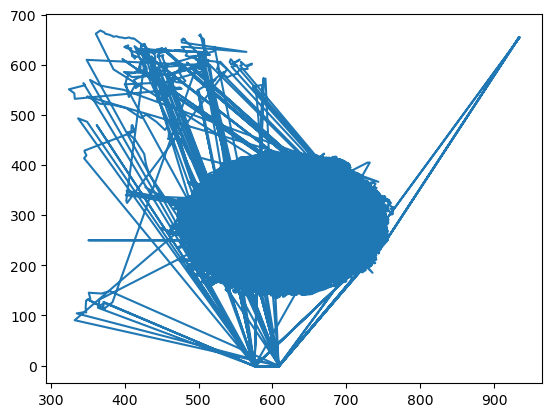

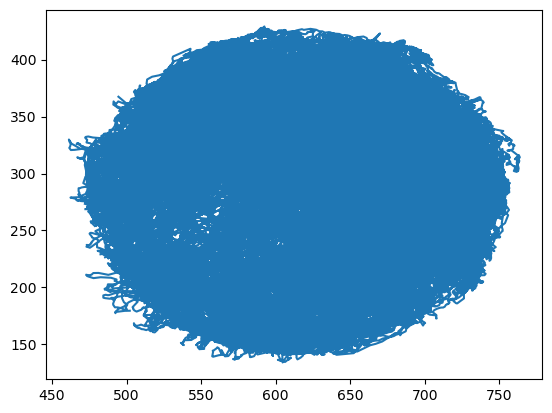

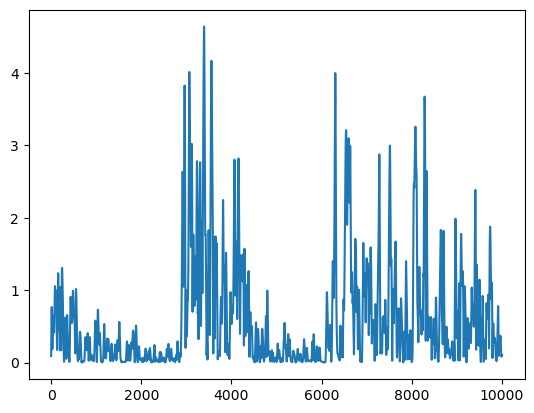


mn_20250619_141151DLC_resnet50_tracked.xlsx



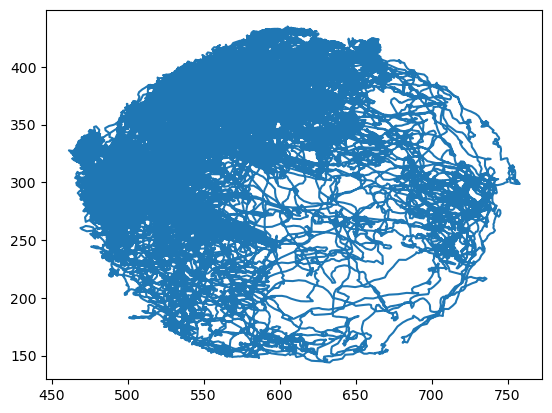

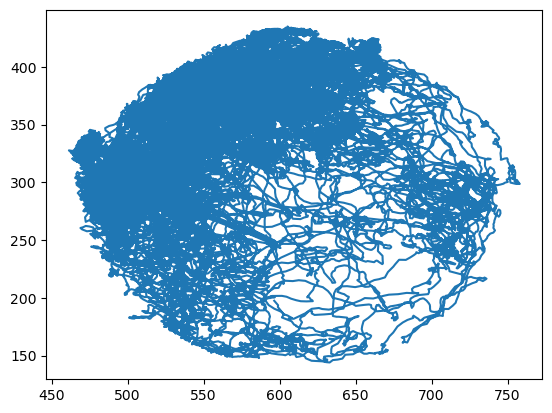

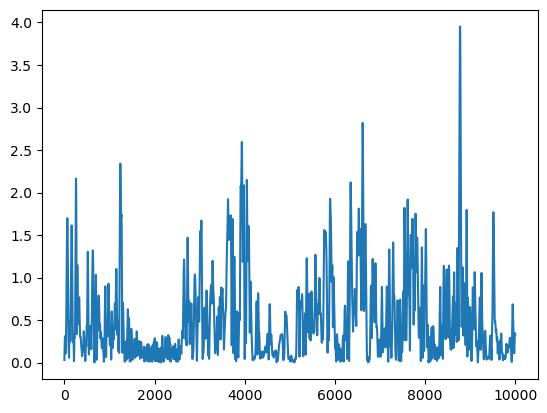


mn_20250620_091517DLC_resnet50_tracked.xlsx



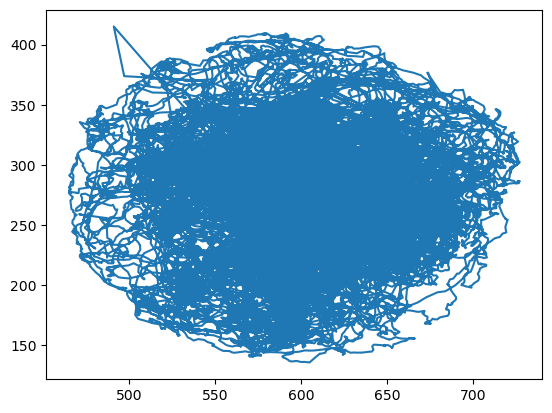

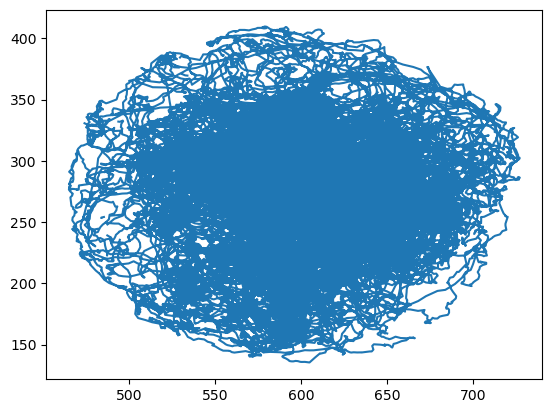

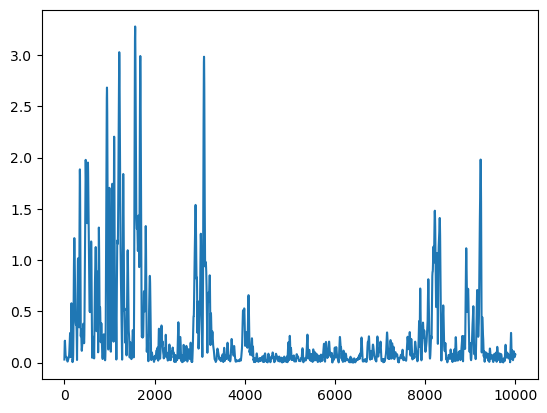


mn_20250620_142949DLC_resnet50_tracked.xlsx



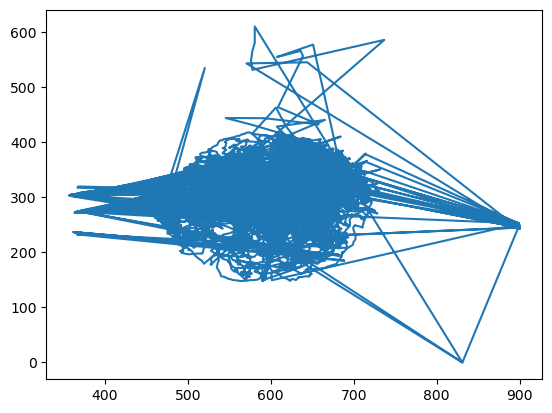

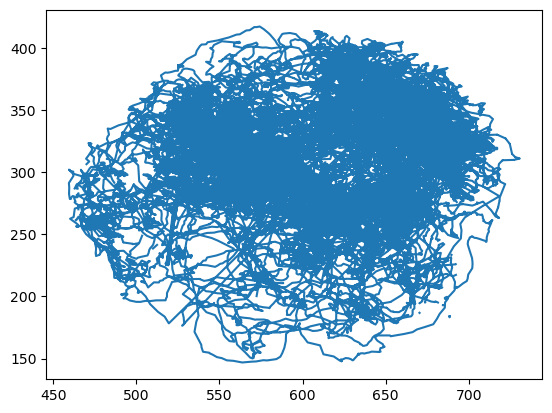

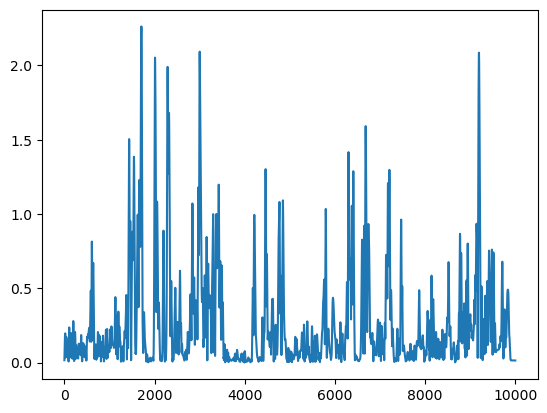

In [8]:
# process each file
for indf, f in enumerate(files):
    print()
    print(f)
    print()
    
    file = pd.read_excel(f)
    plt.plot(file.neck_x,file.neck_y)
    plt.show()
    # compute distance from point (620,280)
    file['neck_dist'] = np.sqrt((file.neck_x-620)**2 + (file.neck_y-280)**2)
    file.loc[file.neck_dist > 200, 'neck_x'] = np.nan
    file.loc[file.neck_dist > 200, 'neck_y'] = np.nan
    # anythong with likelihood less than 0.95 turn into nan
    file.loc[file.neck_likelihood < 0.95, 'neck_x'] = np.nan
    file.loc[file.neck_likelihood < 0.95, 'neck_y'] = np.nan
    plt.plot(file.neck_x,file.neck_y)
    plt.show()
    # interpolate the nan values and smooth the data
    file['neck_x'] = nd.gaussian_filter1d(file['neck_x'].interpolate(), sigma=10)
    file['neck_y'] = nd.gaussian_filter1d(file['neck_y'].interpolate(), sigma=10)
    # compute speed as distance from consecutive xy points
    file['neck_speed'] = np.sqrt((file.neck_x.diff())**2 + (file.neck_y.diff())**2)
    plt.plot(file.neck_speed[:10000])
    plt.show()
    # set time for first frame as start_times[if] and increment by 1/30 sec for each frame
    file['time'] = pd.date_range(start=dates[indf]+start_times[indf], periods=len(file), freq='33.333ms')
    # save columns time, neck_x, neck_y, neck_speed to csv file
    # outname = f.replace('resnet50_tracked.xlsx', 'clean.csv')
    # file[['time', 'neck_x', 'neck_y', 'neck_speed']].to_csv(outname, index=False)

In [32]:
# process last file
file_path = 'mn_20250825_093313DLC_HrnetW32.csv'
file = pd.read_csv(file_path, header=2)

In [26]:
file

,coords,x,y,likelihood,x.1,y.1,likelihood.1,x.2,y.2,likelihood.2
0,0,584.30035,504.89840,0.904297,620.37103,509.65994,0.573242,537.42600,414.82275,0.634277
1,1,584.50995,504.88574,0.877930,622.08780,506.97363,0.963379,535.47156,416.09503,0.681641
2,2,585.11400,506.29080,0.871094,620.52440,508.95325,0.964844,535.88860,415.68237,0.662598
3,3,585.24274,506.19315,0.887207,621.86650,511.08676,0.942871,534.32070,416.93567,0.711914
4,4,585.00946,506.89587,0.875488,620.75790,510.19952,0.963867,534.23254,417.18088,0.692871
...,...,...,...,...,...,...,...,...,...,...
864909,864909,497.80756,508.82214,0.920410,478.25092,498.13324,0.906250,597.54535,462.96664,0.913086
864910,864910,497.56900,508.95023,0.933594,478.29420,497.91452,0.905762,597.55770,462.96515,0.914551
864911,864911,497.56158,508.94287,0.934570,478.27810,497.90775,0.907715,597.57130,462.94794,0.914551
864912,864912,497.56406,508.95148,0.933594,478.26947,497.93323,0.908203,597.56360,462.95563,0.914551


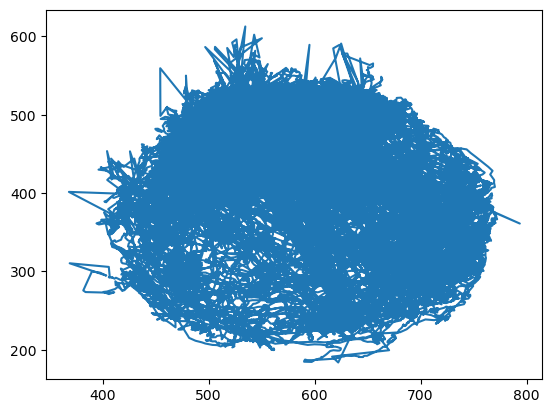

In [27]:
plt.plot(file.x,file.y)
plt.show()

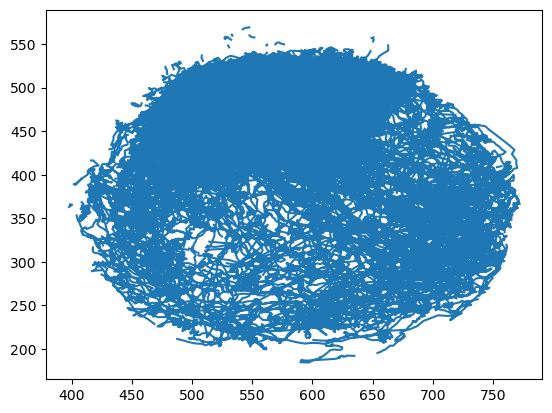

In [28]:
# compute distance from point (580,380)
file['neck_dist'] = np.sqrt((file.x-580)**2 + (file.y-380)**2)
file.loc[file.neck_dist > 200, 'x'] = np.nan
file.loc[file.neck_dist > 200, 'y'] = np.nan
# anythong with likelihood less than 0.8 turn into nan
file.loc[file.likelihood < 0.8, 'x'] = np.nan
file.loc[file.likelihood < 0.8, 'y'] = np.nan
plt.plot(file.x,file.y)
plt.show()

In [30]:
start_time = '09:33:30'
date = '20250825'

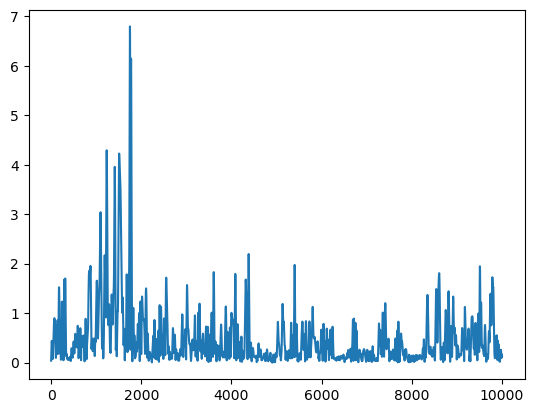

In [33]:
# interpolate the nan values and smooth the data
file['neck_x'] = nd.gaussian_filter1d(file['x'].interpolate(), sigma=10)
file['neck_y'] = nd.gaussian_filter1d(file['y'].interpolate(), sigma=10)
# compute speed as distance from consecutive xy points
file['neck_speed'] = np.sqrt((file.neck_x.diff())**2 + (file.neck_y.diff())**2)
plt.plot(file.neck_speed[:10000])
plt.show()
# set time for first frame as start_times[if] and increment by 1/30 sec for each frame
file['time'] = pd.date_range(start=date+' '+start_time, periods=len(file), freq='33.333ms')
# save columns time, neck_x, neck_y, neck_speed to csv file
outname = file_path.replace('HrnetW32.csv', 'clean.csv')
file[['time', 'neck_x', 'neck_y', 'neck_speed']].to_csv(outname, index=False)

# check end of files time

In [11]:
# load each file and print only first and last lines
for f in files:
    outname = f.replace('resnet50_tracked.xlsx', 'clean.csv')
    file = pd.read_csv(outname)
    print(f)
    print(file.iloc[0])
    print(file.iloc[-1])
    print()

mn_20250619_093749DLC_resnet50_tracked.xlsx
time          2025-06-19 09:38:01.000000
neck_x                        721.514605
neck_y                        298.022495
neck_speed                           NaN
Name: 0, dtype: object
time          2025-06-19 12:45:00.787801
neck_x                           729.944
neck_y                          283.4586
neck_speed                           0.0
Name: 336597, dtype: object

mn_20250619_141151DLC_resnet50_tracked.xlsx
time          2025-06-19 02:12:03.000000
neck_x                         586.85301
neck_y                        388.428209
neck_speed                           NaN
Name: 0, dtype: object
time          2025-06-19 05:47:06.704295
neck_x                        499.216783
neck_y                        284.215842
neck_speed                      0.000138
Name: 387115, dtype: object

mn_20250620_091517DLC_resnet50_tracked.xlsx
time          2025-06-20 09:15:29.000000
neck_x                        714.015389
neck_y                    

In [34]:
# same for last file
outname = file_path.replace('HrnetW32.csv', 'clean.csv')
file = pd.read_csv(outname)
print(file.iloc[0])
print(file.iloc[-1])

time          2025-08-25 09:33:30.000000
neck_x                        584.320155
neck_y                        505.472947
neck_speed                           NaN
Name: 0, dtype: object
time          2025-08-25 17:34:00.145029
neck_x                        497.695976
neck_y                        508.823407
neck_speed                      0.000894
Name: 864913, dtype: object


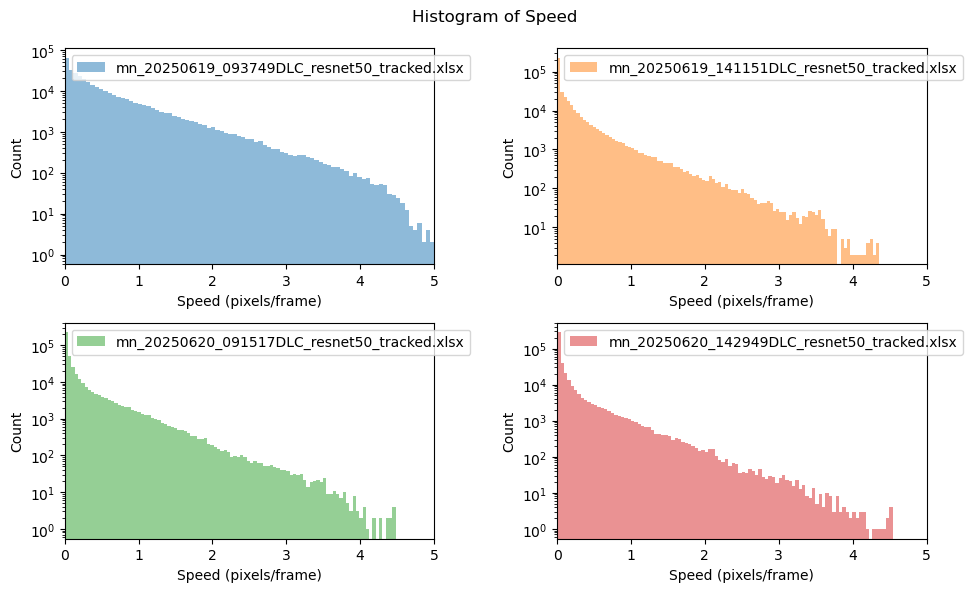

In [13]:
# plot all speeds histograms
plt.figure(figsize=(10,6))
for indf, f in enumerate(files):
    plt.subplot(2,2,1+indf)

    outname = f.replace('resnet50_tracked.xlsx', 'clean.csv')
    file = pd.read_csv(outname)
    plt.hist(file.neck_speed, bins=100, alpha=0.5, label=f,color='C'+str(indf))
    plt.yscale('log')
    plt.xlim(0,5)
    plt.xlabel('Speed (pixels/frame)')
    plt.ylabel('Count')
    plt.legend()
plt.suptitle('Histogram of Speed')
plt.tight_layout()
plt.show()

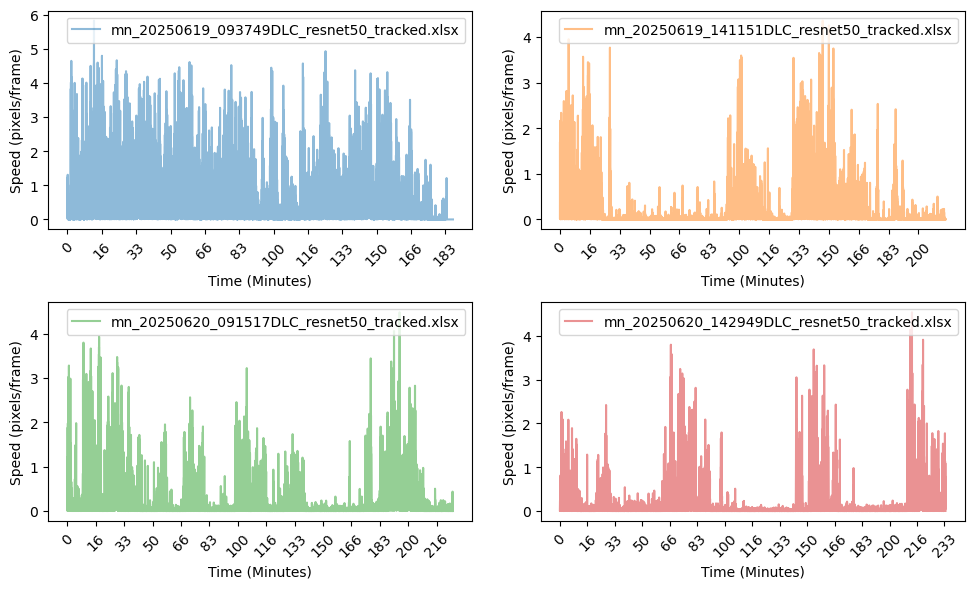

In [21]:
# plot all speeds
plt.figure(figsize=(10,6))
for indf, f in enumerate(files):
    plt.subplot(2,2,1+indf)

    outname = f.replace('resnet50_tracked.xlsx', 'clean.csv')
    file = pd.read_csv(outname)
    plt.plot(file.neck_speed,alpha=0.5, label=f,color='C'+str(indf))
    # plt.yscale('log')
    # plt.xlim(0,5)
    plt.ylabel('Speed (pixels/frame)')
    # rotate x ticks
    plt.xticks(np.arange(0, len(file), step=30000),np.arange(0, len(file), step=30000)//(30*60))
    plt.xticks(rotation=45)
    # plt.title(f)
    plt.xlabel('Time (Minutes)')
    plt.legend()
plt.tight_layout()
plt.show()

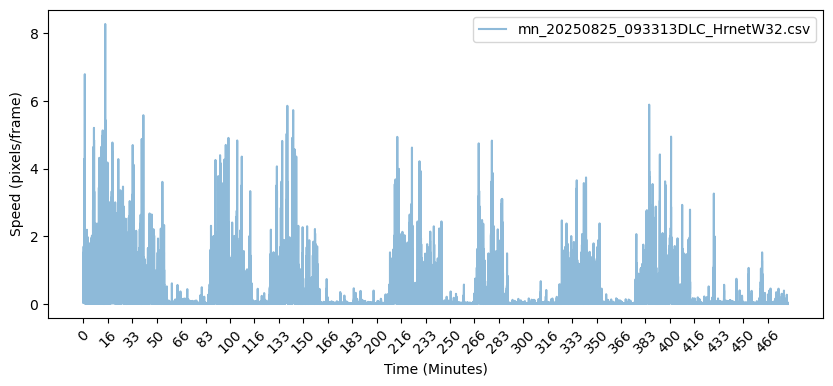

In [36]:
# plot speed of last animal
outname = file_path.replace('HrnetW32.csv', 'clean.csv')
file = pd.read_csv(outname)
plt.figure(figsize=(10,4))
plt.plot(file.neck_speed,alpha=0.5, label=file_path,color='C0')
# plt.yscale('log')
# plt.xlim(0,5)
plt.ylabel('Speed (pixels/frame)')
# rotate x ticks
plt.xticks(np.arange(0, len(file), step=30000),np.arange(0, len(file), step=30000)//(30*60))
plt.xticks(rotation=45)
# plt.title(f)
plt.xlabel('Time (Minutes)')
plt.legend()
plt.show()

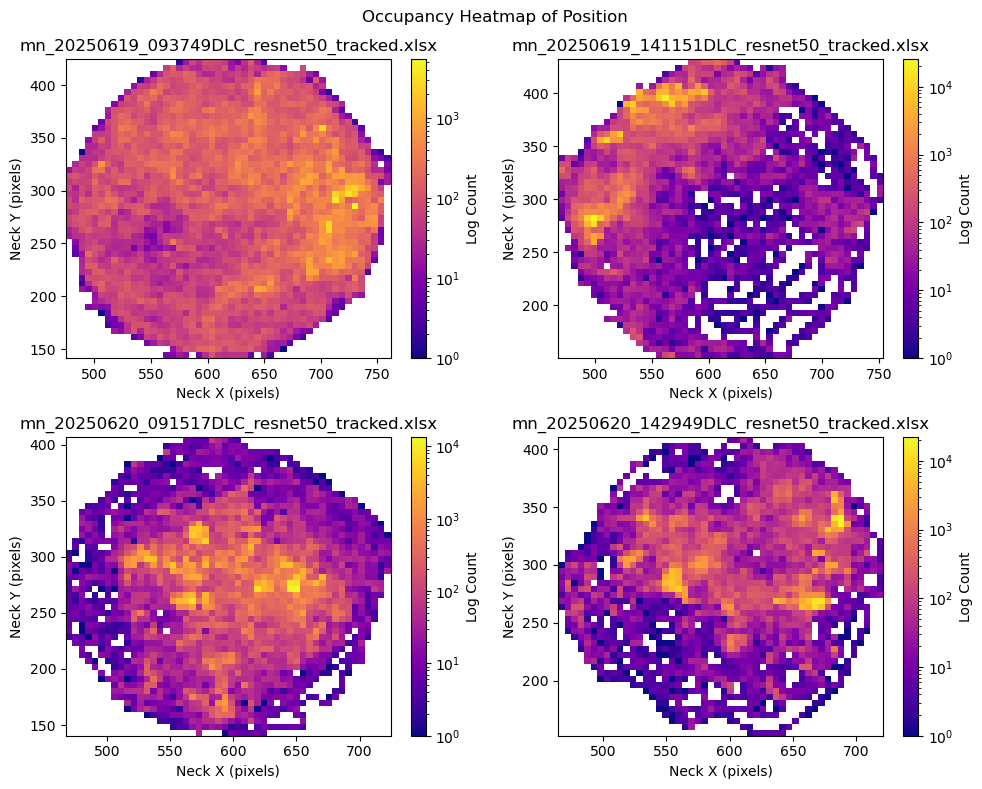

In [22]:
# plot all occupancy histograms in log count
plt.figure(figsize=(10,8))
for indf, f in enumerate(files):
    plt.subplot(2,2,1+indf)

    outname = f.replace('resnet50_tracked.xlsx', 'clean.csv')
    file = pd.read_csv(outname)
    plt.hist2d(file.neck_x, file.neck_y, bins=50, cmap='plasma', norm=plt.matplotlib.colors.LogNorm())
    plt.colorbar(label='Log Count')
    plt.xlabel('Neck X (pixels)')
    plt.ylabel('Neck Y (pixels)')
    plt.title(f)

plt.suptitle('Occupancy Heatmap of Position')
plt.tight_layout()
plt.show()

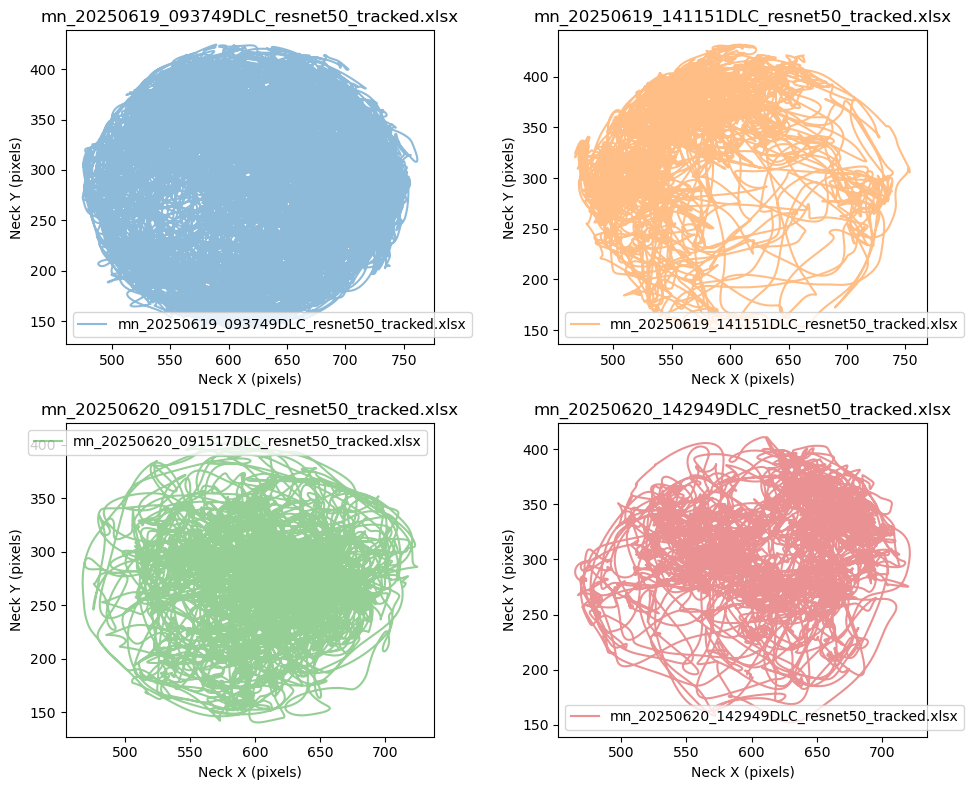

In [28]:
# plot the traces x,y
plt.figure(figsize=(10,8))
for indf, f in enumerate(files):
    plt.subplot(2,2,1+indf)

    outname = f.replace('resnet50_tracked.xlsx', 'clean.csv')
    file = pd.read_csv(outname)
    plt.plot(file.neck_x, file.neck_y, alpha=0.5, label=f, color='C'+str(indf))
    plt.xlabel('Neck X (pixels)')
    plt.ylabel('Neck Y (pixels)')
    plt.title(f)
    plt.legend()
# plt.suptitle('Traces of Neck Position')
plt.tight_layout()
plt.show()

# example of first file

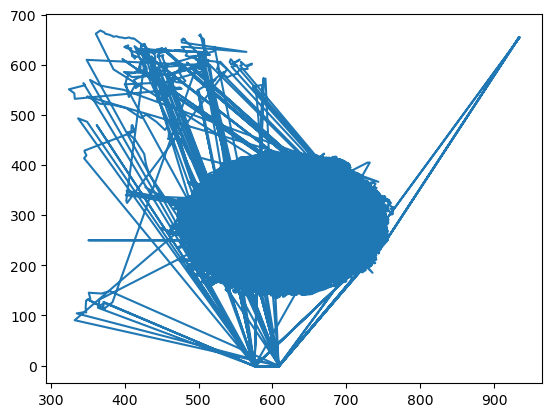

In [ ]:
file = pd.read_excel('mn_20250619_093749DLC_resnet50_tracked.xlsx')
plt.plot(file.neck_x,file.neck_y)

In [24]:
file['neck_dist'] = np.sqrt((file.neck_x-620)**2 + (file.neck_y-280)**2)
file.loc[file.neck_dist > 200, 'neck_x'] = np.nan
file.loc[file.neck_dist > 200, 'neck_y'] = np.nan

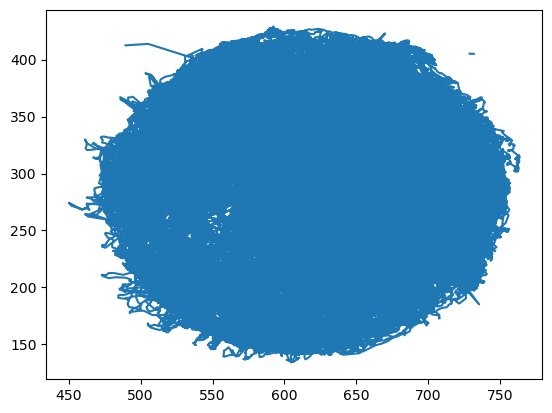

In [25]:
plt.plot(file.neck_x,file.neck_y)

In [26]:
# anythong with likelihood less than 0.95 turn into nan
file.loc[file.neck_likelihood < 0.95, 'neck_x'] = np.nan
file.loc[file.neck_likelihood < 0.95, 'neck_y'] = np.nan

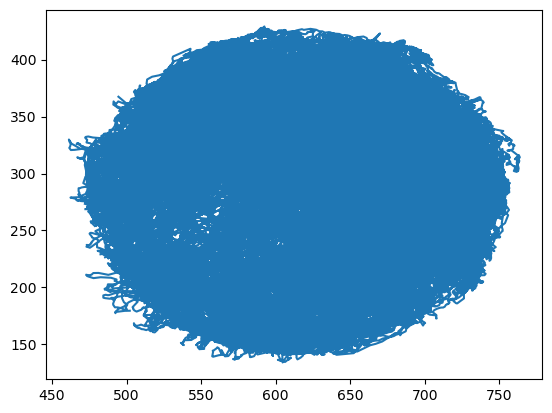

In [27]:
plt.plot(file.neck_x,file.neck_y)

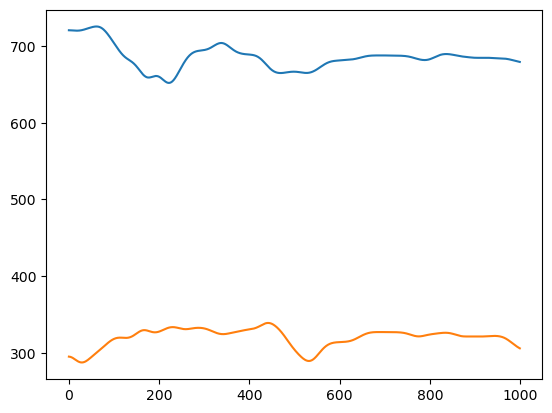

In [33]:
# interpolate the nan values and smooth the data
file['neck_x'] = nd.gaussian_filter1d(file['neck_x'].interpolate(), sigma=10)
file['neck_y'] = nd.gaussian_filter1d(file['neck_y'].interpolate(), sigma=10)
plt.plot(file.neck_x[:1000])
plt.plot(file.neck_y[:1000])

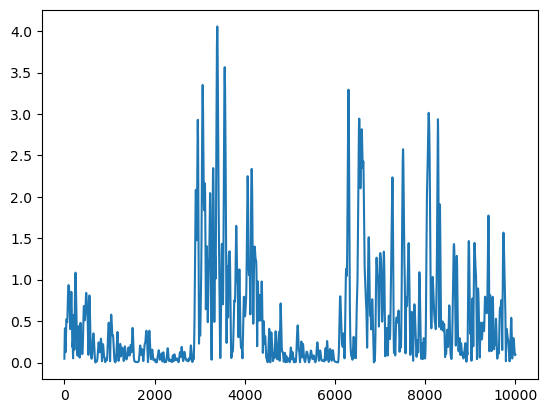

In [ ]:
# compute speed as distance from consecutive xy points
file['neck_speed'] = np.sqrt((file.neck_x.diff())**2 + (file.neck_y.diff())**2)
plt.plot(file.neck_speed[:10000])

In [37]:
# set time for first frame as '09:38:01' and increment by 1/30 sec for each frame
file['time'] = pd.date_range(start='09:38:01', periods=len(file), freq='33.333ms')

In [38]:
file

,frame_num,neck_x,neck_y,neck_likelihood,notes,neck_dist,neck_speed,time
0,0,720.774500,294.867573,0.9981,mouse taken out of enclosure frame 331519,109.348584,NaN,2025-06-30 09:38:01.000000
1,1,720.766938,294.822196,0.9986,NaN,106.817893,0.046003,2025-06-30 09:38:01.033333
2,2,720.752008,294.731997,0.9979,NaN,104.390670,0.091426,2025-06-30 09:38:01.066666
3,3,720.730090,294.598082,0.9976,NaN,104.556405,0.135697,2025-06-30 09:38:01.099999
4,4,720.701745,294.422089,0.9984,NaN,104.913376,0.178261,2025-06-30 09:38:01.133332
...,...,...,...,...,...,...,...,...
336593,336593,729.944000,283.458600,0.0000,NaN,281.238825,0.000000,2025-06-30 12:45:00.654469
336594,336594,729.944000,283.458600,0.0000,NaN,281.240649,0.000000,2025-06-30 12:45:00.687802
336595,336595,729.944000,283.458600,0.0000,NaN,281.240696,0.000000,2025-06-30 12:45:00.721135
336596,336596,729.944000,283.458600,0.0000,NaN,281.242230,0.000000,2025-06-30 12:45:00.754468


In [39]:
# save columns time, neck_x, neck_y, neck_speed to csv file
file[['time', 'neck_x', 'neck_y', 'neck_speed']].to_csv('mn_20250619_093749DLC_clean.csv', index=False)